## Computer vision libraries in PyTorch

* `torchvision` - base domain library for pytorch computer vision.
* `torchvision.datasets` - get datasets and data loading functions for computer vision here.
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems.                        
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with an ML model.  
* `torch.utils.data.Dataset` - Base dataset class for Pytorch.
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset.
                                                                                                

In [1]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# check version
print(torch.__version__)
print(torchvision.__version__)

device = "cuda" if torch.cuda.is_available() else "cpu"
device = "cpu"
device

2.2.0+cu121
0.17.0+cu121


'cpu'

## 1. Getting a dataset


In [2]:
# Setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data",
    train=True, # Do we wnat the training dataset?
    download=True,
    transform=torchvision.transforms.ToTensor(), # how do we want to transform the data?
    target_transform=None # How do we want to transoform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [3]:
len(train_data), len(test_data), len(train_data[0]), len(test_data[0])

(60000, 10000, 2, 2)

In [4]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
 class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
# Check input and output shapes of data
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


# 1.2 Visualizing our data

Image shape:torch.Size([1, 28, 28])


(-0.5, 27.5, 27.5, -0.5)

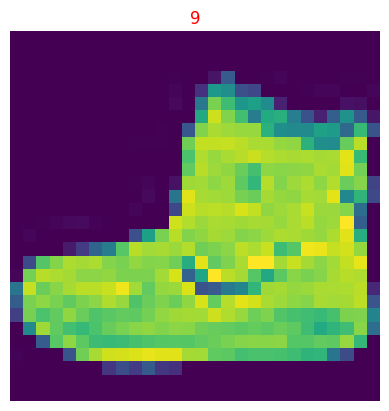

In [9]:
  import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape:{image.shape}")

plt.imshow(image.squeeze())
plt.title(label, color='red');
plt.axis(False)

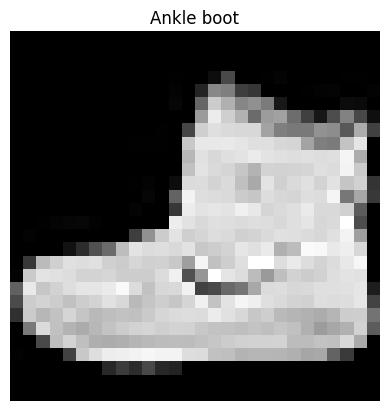

In [10]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label]);
plt.axis(False);

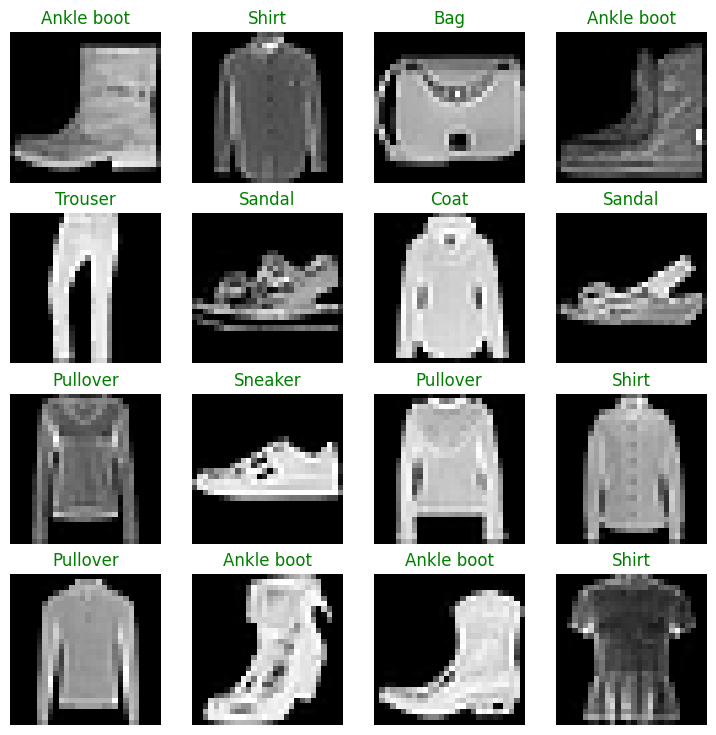

In [11]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1): # 4*4+1 = 17
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    # print(random_idx)
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label], color='green')
    plt.axis(False);

In [12]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                             batch_size=BATCH_SIZE,
                             shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                            batch_size=BATCH_SIZE,
                            shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x18fad31c8f0>,
 <torch.utils.data.dataloader.DataLoader at 0x18fb39c0800>)

In [13]:
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x0000018FAD31C8F0>, <torch.utils.data.dataloader.DataLoader object at 0x0000018FB39C0800>)
Length of train_dataloader: 1875 batches of 32...
Length of test_dataloader: 313 batches of 32...


In [14]:
# checking what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


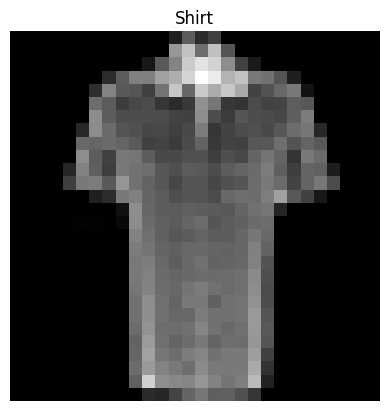

In [15]:
# Visualzing a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)

print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

# 3. Model 0: Building a baseline model
* Start simply and add complexity when necessary

In [16]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

print(f"Shape before flattening: {x.shape}")
print(f"Shape after flattening: {output.shape}")

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [17]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                input_shape: int,
                hidden_units: int,
                output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                     out_features=hidden_units),
            nn.Linear(in_features=hidden_units,
                     out_features=output_shape)
        )
    def forward(self, x):
        return self.layer_stack(x)

In [18]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=28*28,
    hidden_units=10,
    output_shape=len(class_names) # 10
).to(device)

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [19]:
dummy_x = torch.rand([1, 1, 28, 28]).to(device)
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [20]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

In [21]:
import requests
from pathlib import Path

# Download helper functions from my github
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download...")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/Jamshid-Ganiev/PyTorch-for-Deep-Learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

helper_functions.py already exists, skipping download...


In [22]:
# Import accuracy metric
from helper_functions import accuracy_fn

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                           lr=0.1)

# 3.2 Creating a function to time our experiments

Two of the main things we'll want to track are:
1. Model's performance (loss and accuracy values etc)
2. How fast it runs

In [23]:
from timeit import default_timer as timer
def print_train_time(start: float,
                    end: float,
                    device: torch.device = None):
    """Prints diff between start and end time."""
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [24]:
start_time = timer()
# some code......
end_time = timer()
print_train_time(start=start_time, end=end_time, device=device)

Train time on cpu: 0.000 seconds


1.5900004655122757e-05

## 3.3 creating a training loop and training a model on batches of data

In [25]:
##### If in doubt, code it out #####
from tqdm import tqdm # for progress bar

### Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 5

# Create training nad test loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------")

    # training
    train_loss = 0

    # Add a loop to loop through the training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        # 1. Forward pass
        y_pred = model_0(X) # X_train set

        # 2. Calculate the loss (per batch)
        loss = loss_fn(y_pred, y) # y = y_train set
        train_loss += loss # accumulate train loss

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss Backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out what's happening'
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)} / {len(train_dataloader.dataset)} samples.")
            
    # Divide total train loss by length of train dataloader
    train_loss /= len(train_dataloader)

    ### Testing
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X_test)

            # 2. Calculate the loss & Acc
            test_loss += loss_fn(test_pred, y_test)
            
            test_acc += accuracy_fn(y_true = y_test, y_pred = test_pred.argmax(dim=1))

        # Calcualte the test loss average per batch
        test_loss /= len(test_dataloader)

        # Calculate the test acc average per batch
        test_acc /= len(test_dataloader)

    # Print out what's happenin'
    print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))            

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.


 20%|████████████████▊                                                                   | 1/5 [00:03<00:14,  3.72s/it]


Train loss: 0.5904 | Test loss: 0.5095, Test acc: 82.0387
Epoch: 1
------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.


 40%|█████████████████████████████████▌                                                  | 2/5 [00:07<00:10,  3.65s/it]


Train loss: 0.4763 | Test loss: 0.4799, Test acc: 83.1969
Epoch: 2
------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.


 60%|██████████████████████████████████████████████████▍                                 | 3/5 [00:10<00:07,  3.61s/it]


Train loss: 0.4550 | Test loss: 0.4766, Test acc: 83.4265
Epoch: 3
------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.


 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [00:14<00:03,  3.58s/it]


Train loss: 0.4425 | Test loss: 0.4631, Test acc: 83.7460
Epoch: 4
------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.60s/it]


Train loss: 0.4358 | Test loss: 0.4687, Test acc: 83.2668
Train time on cpu: 18.004 seconds


# 4. Make predictions and get Model 0 results

In [26]:
from tqdm import tqdm
import time

torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader."""
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            # Make predictions
            y_pred = model(X)

            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                              y_pred=y_pred.argmax(dim=1))

        # Scale loss an acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model was created with a class
           "model_loss": round(loss.item(), 3),
            "model_acc": round(acc, 3)
           }

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn)
model_0_results

100%|███████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 843.66it/s]


{'model_name': 'FashionMNISTModelV0', 'model_loss': 0.469, 'model_acc': 83.267}